##### H0 = No difference in the mean of population or group 
##### Ha = There is difference in the mean of population or group 
##### Alpha = 0.05 

In [1]:
library(tidyverse)
library(datarium)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### read data from library datarium

In [15]:
dataan <- anxiety
dataan

id,group,t1,t2,t3
<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,grp1,14.1,14.4,14.1
2,grp1,14.5,14.6,14.3
3,grp1,15.7,15.2,14.9
4,grp1,16.0,15.5,15.3
5,grp1,16.5,15.8,15.7
6,grp1,16.9,16.5,16.2
7,grp1,17.0,16.8,16.5
8,grp1,17.0,17.1,16.6
9,grp1,17.3,16.9,16.5


In [3]:
dataan_longer <- dataan %>%
  pivot_longer(cols = 3:5,
               names_to = "observation",
               values_to = "reads")
dataan_longer

id,group,observation,reads
<fct>,<fct>,<chr>,<dbl>
1,grp1,t1,14.1
1,grp1,t2,14.4
1,grp1,t3,14.1
2,grp1,t1,14.5
2,grp1,t2,14.6
2,grp1,t3,14.3
3,grp1,t1,15.7
3,grp1,t2,15.2
3,grp1,t3,14.9


In [4]:
# we check the data for normal distribution
shapiro.test(dataan_longer $ reads)


	Shapiro-Wilk normality test

data:  dataan_longer$reads
W = 0.98698, p-value = 0.2316


#### Bartlett test: to check the homogeneity of variances

In [5]:
bartlett.test(reads ~ observation, data = dataan_longer)


	Bartlett test of homogeneity of variances

data:  reads by observation
Bartlett's K-squared = 3.3527, df = 2, p-value = 0.1871


In [6]:
aov_model <- aov(reads ~ observation, data = dataan_longer)
summary(aov_model)

             Df Sum Sq Mean Sq F value   Pr(>F)    
observation   2   66.6   33.29   10.84 4.38e-05 ***
Residuals   132  405.4    3.07                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [7]:
TukeyHSD(aov_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = reads ~ observation, data = dataan_longer)

$observation
            diff       lwr         upr     p adj
t2-t1 -0.7800000 -1.655747  0.09574702 0.0914210
t3-t1 -1.7177778 -2.593525 -0.84203076 0.0000236
t3-t2 -0.9377778 -1.813525 -0.06203076 0.0327338


In [8]:
write.csv(dataan_longer, "anxity.csv")

### just testing ####

In [9]:
# Set seed for reproducibility
set.seed(123)

# Generate sample data
pre_test <- rnorm(20, mean = 10, sd = 2)
post_test <- pre_test + rnorm(20, mean = 2, sd = 1)

# Create a data frame
data <- data.frame(PreTest = pre_test, PostTest = post_test)


data


PreTest,PostTest
<dbl>,<dbl>
8.879049,9.811225
9.539645,11.321670
13.117417,14.091412
10.141017,11.412126
10.258575,11.633536
13.430130,13.743437
10.921832,13.759619
7.469878,9.623251
8.626294,9.488157


In [10]:
# Perform Wilcoxon Signed Rank Test
wilcox.test(data$PreTest, data$PostTest, paired = TRUE)



	Wilcoxon signed rank exact test

data:  data$PreTest and data$PostTest
V = 0, p-value = 1.907e-06
alternative hypothesis: true location shift is not equal to 0


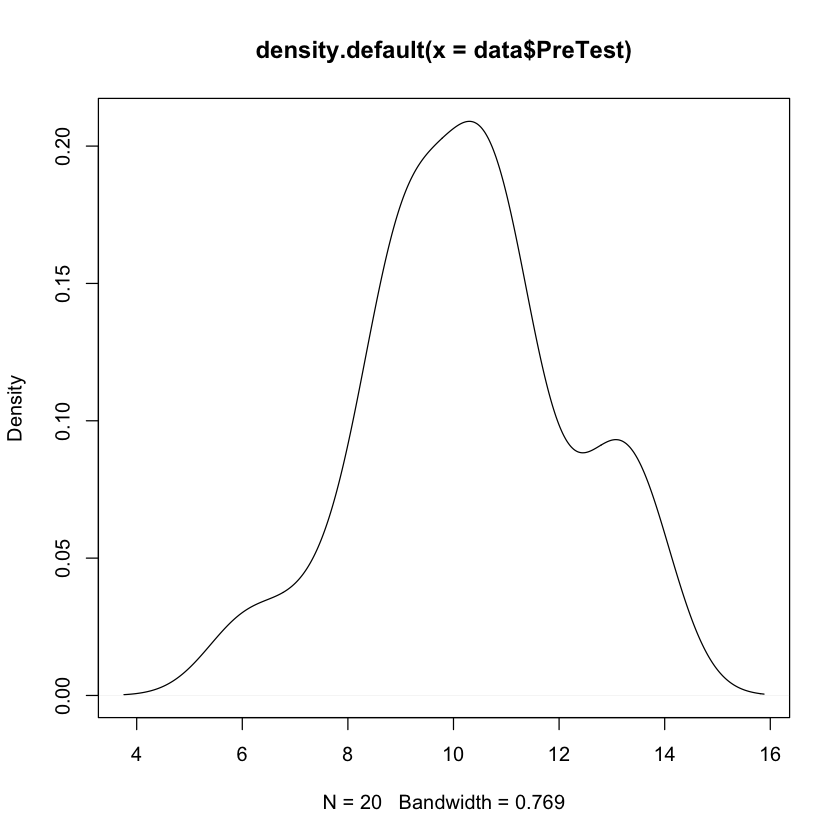

integer(0)


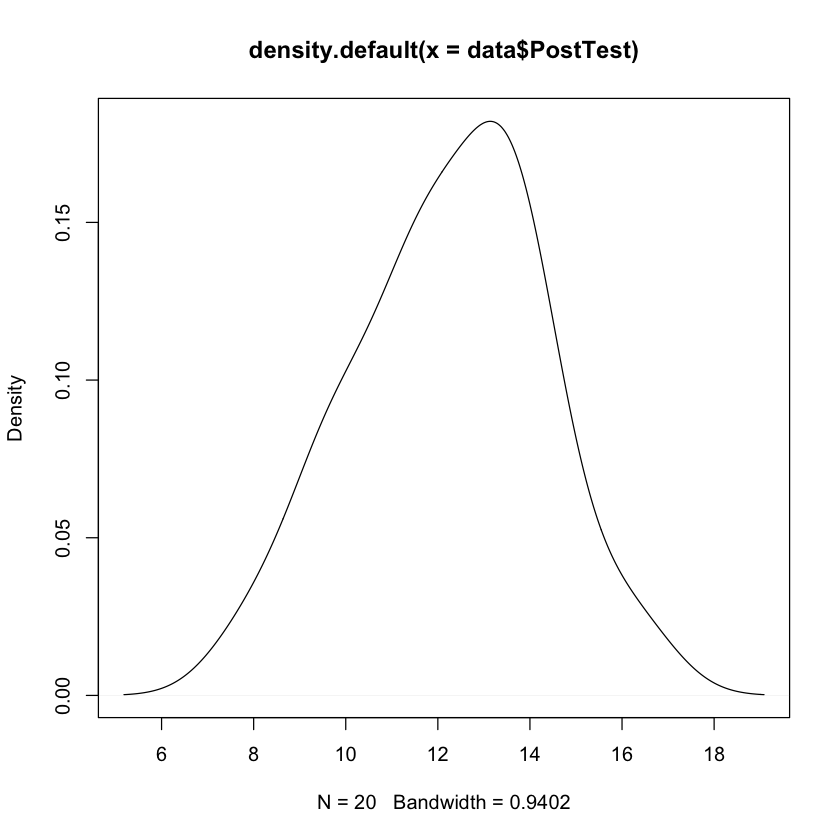

In [11]:
test1 <- plot(density(data$PreTest))
test2 <- plot(density(data$PostTest))
test <- test1+ test2
print(test)

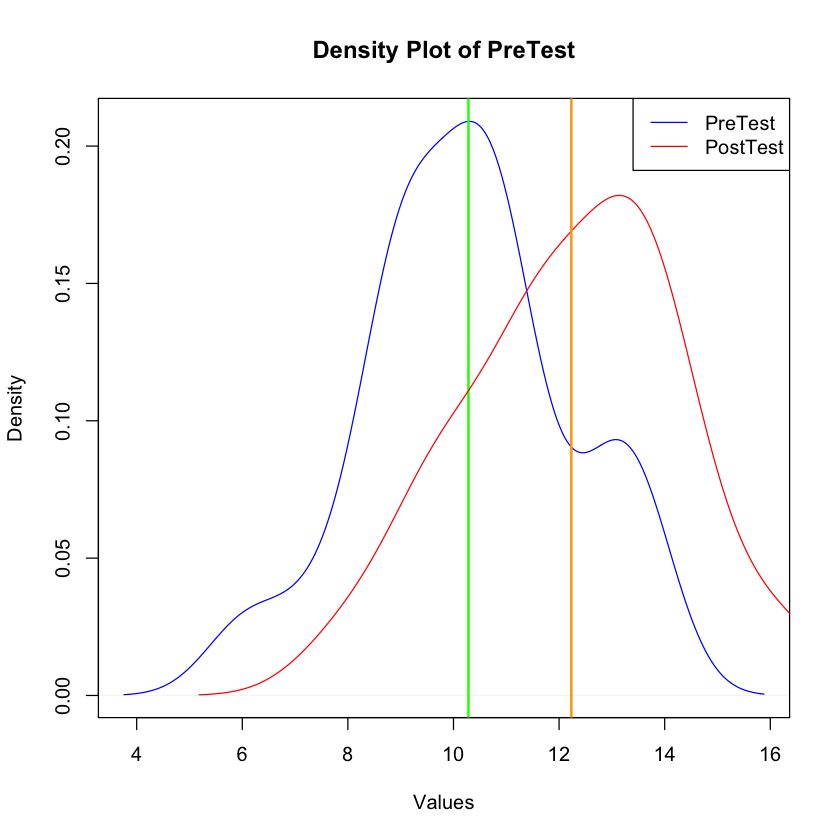

In [12]:
# Plot density of PreTest
test1 <- density(data$PreTest)
plot(test1, main = "Density Plot of PreTest", xlab = "Values", col = "blue")

# Add abline to the first plot
abline(v = mean(data$PreTest), col = "green", lwd = 2)

# Plot density of PostTest
test2 <- density(data$PostTest)
lines(test2, col = "red")

# Add abline to the second plot
abline(v = mean(data$PostTest), col = "orange", lwd = 2)

# Add legend
legend("topright", legend = c("PreTest", "PostTest"), col = c("blue", "red"), lty = 1)

# Print the plot



In [13]:
mean(data$PreTest)
mean(data$PostTest)

[1] 10.28325

[1] 12.23199

In [14]:
install.packages("coin")

Aktualisiere HTML-Index der Pakete in '.Library'

Making 'packages.html' ...
 fertig



In [26]:
3650552 - 4747105

[1] -1096553